TEXT MINING Q2


In [6]:
# Importing requests to extract content from a url
import requests 
# Beautifulsoup is for web scrapping...used to scrap specific content
from bs4 import BeautifulSoup as bs
# regular expressions
import re 

In [7]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import string
import spacy
import seaborn as sns

In [8]:
amazon_reviews=[]

In [9]:
for i in range(1,20):
  ip=[]  

  url = "https://www.amazon.in/Echo-Dot-3rd-Gen/product-reviews/B07PFFMP9P/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
  # Extracting the content under specific tags  
# Extracting the content under specific tags    
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
amazon_reviews=amazon_reviews+ip   # 

In [11]:
amazon_reviews
Data=pd.DataFrame(amazon_reviews)

In [12]:
Data

,0
0,\n\n\n\n\n The media could ...
1,\nI purchased this as a birthday gift for my 7...
2,\n\n\n\n\n The media could ...
3,\n\n\n\n\n The media could ...
4,\nIts just one if the best deal i ever got on ...
5,\n\n\n\n\n The media could ...
6,\nBefore buying this product please keep these...
7,\nI am using alexa dot 2nd Gen and today I hav...
8,\n\n\n\n\n The media could ...
9,\nFor 2000 using 10% off..you are getting a bu...


In [13]:
Data.columns=['text']

In [14]:
len(Data)

10

In [15]:
affin=pd.read_csv(r'Afinn.csv', sep = ',',encoding='latin-1')
affin.shape

(2477, 2)

In [16]:
Data_1 = [Text.strip() for Text in Data.text]#removing blank spaces
Data_2 = [text for text in Data_1 if text]#removing black lines

In [17]:
Data_2[0:25]

['The media could not be loaded.\n                \n\n\n\n\xa0Alexa cannot hear after she starts playing',
 'I purchased this as a birthday gift for my 7 years old son. Since he don\'t have siblings so I though it would be a fun experience for him talking to and giving commands to alexa. But to my dismay he only used it for playing music that also only one song after one month of his birthday. "Alexa please play the flying jat song". There were things I demonstrated him about alexa like jungle quiz, panchtantra ki kahaniya, alexa laugh, beatbox, fart!  Etc. But after one month of use he lost interest in it and being powered from socket I am also not interested to use it as a bluetooth speaker. I configured it to control a wipro smart bulb. But after few days  I started using the smart bulb as a regular bulb because it\'s easier to press the physical switch compared to checking the configuration & connection everytime "Alexa Bulb on" or "Alexa bulb off" voice command doesn\'t work. So n

In [19]:
# word tokenizing
from nltk import tokenize
tokenize_word = tokenize.word_tokenize(" ".join(Data_2))
tokenize_word[0:15]

['The',
 'media',
 'could',
 'not',
 'be',
 'loaded',
 '.',
 'Alexa',
 'can',
 'not',
 'hear',
 'after',
 'she',
 'starts',
 'playing']

In [20]:
# getting basic word by lemitization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lematized_tokens = [lemmatizer.lemmatize(word) for word in tokenize_word]
words=' '.join(lematized_tokens)
words

"The medium could not be loaded . Alexa can not hear after she start playing I purchased this a a birthday gift for my 7 year old son . Since he do n't have sibling so I though it would be a fun experience for him talking to and giving command to alexa . But to my dismay he only used it for playing music that also only one song after one month of his birthday . `` Alexa please play the flying jat song '' . There were thing I demonstrated him about alexa like jungle quiz , panchtantra ki kahaniya , alexa laugh , beatbox , fart ! Etc . But after one month of use he lost interest in it and being powered from socket I am also not interested to use it a a bluetooth speaker . I configured it to control a wipro smart bulb . But after few day I started using the smart bulb a a regular bulb because it 's easier to press the physical switch compared to checking the configuration & connection everytime `` Alexa Bulb on '' or `` Alexa bulb off '' voice command doe n't work . So now it is kept idle

In [21]:
from wordcloud import WordCloud, STOPWORDS

In [22]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

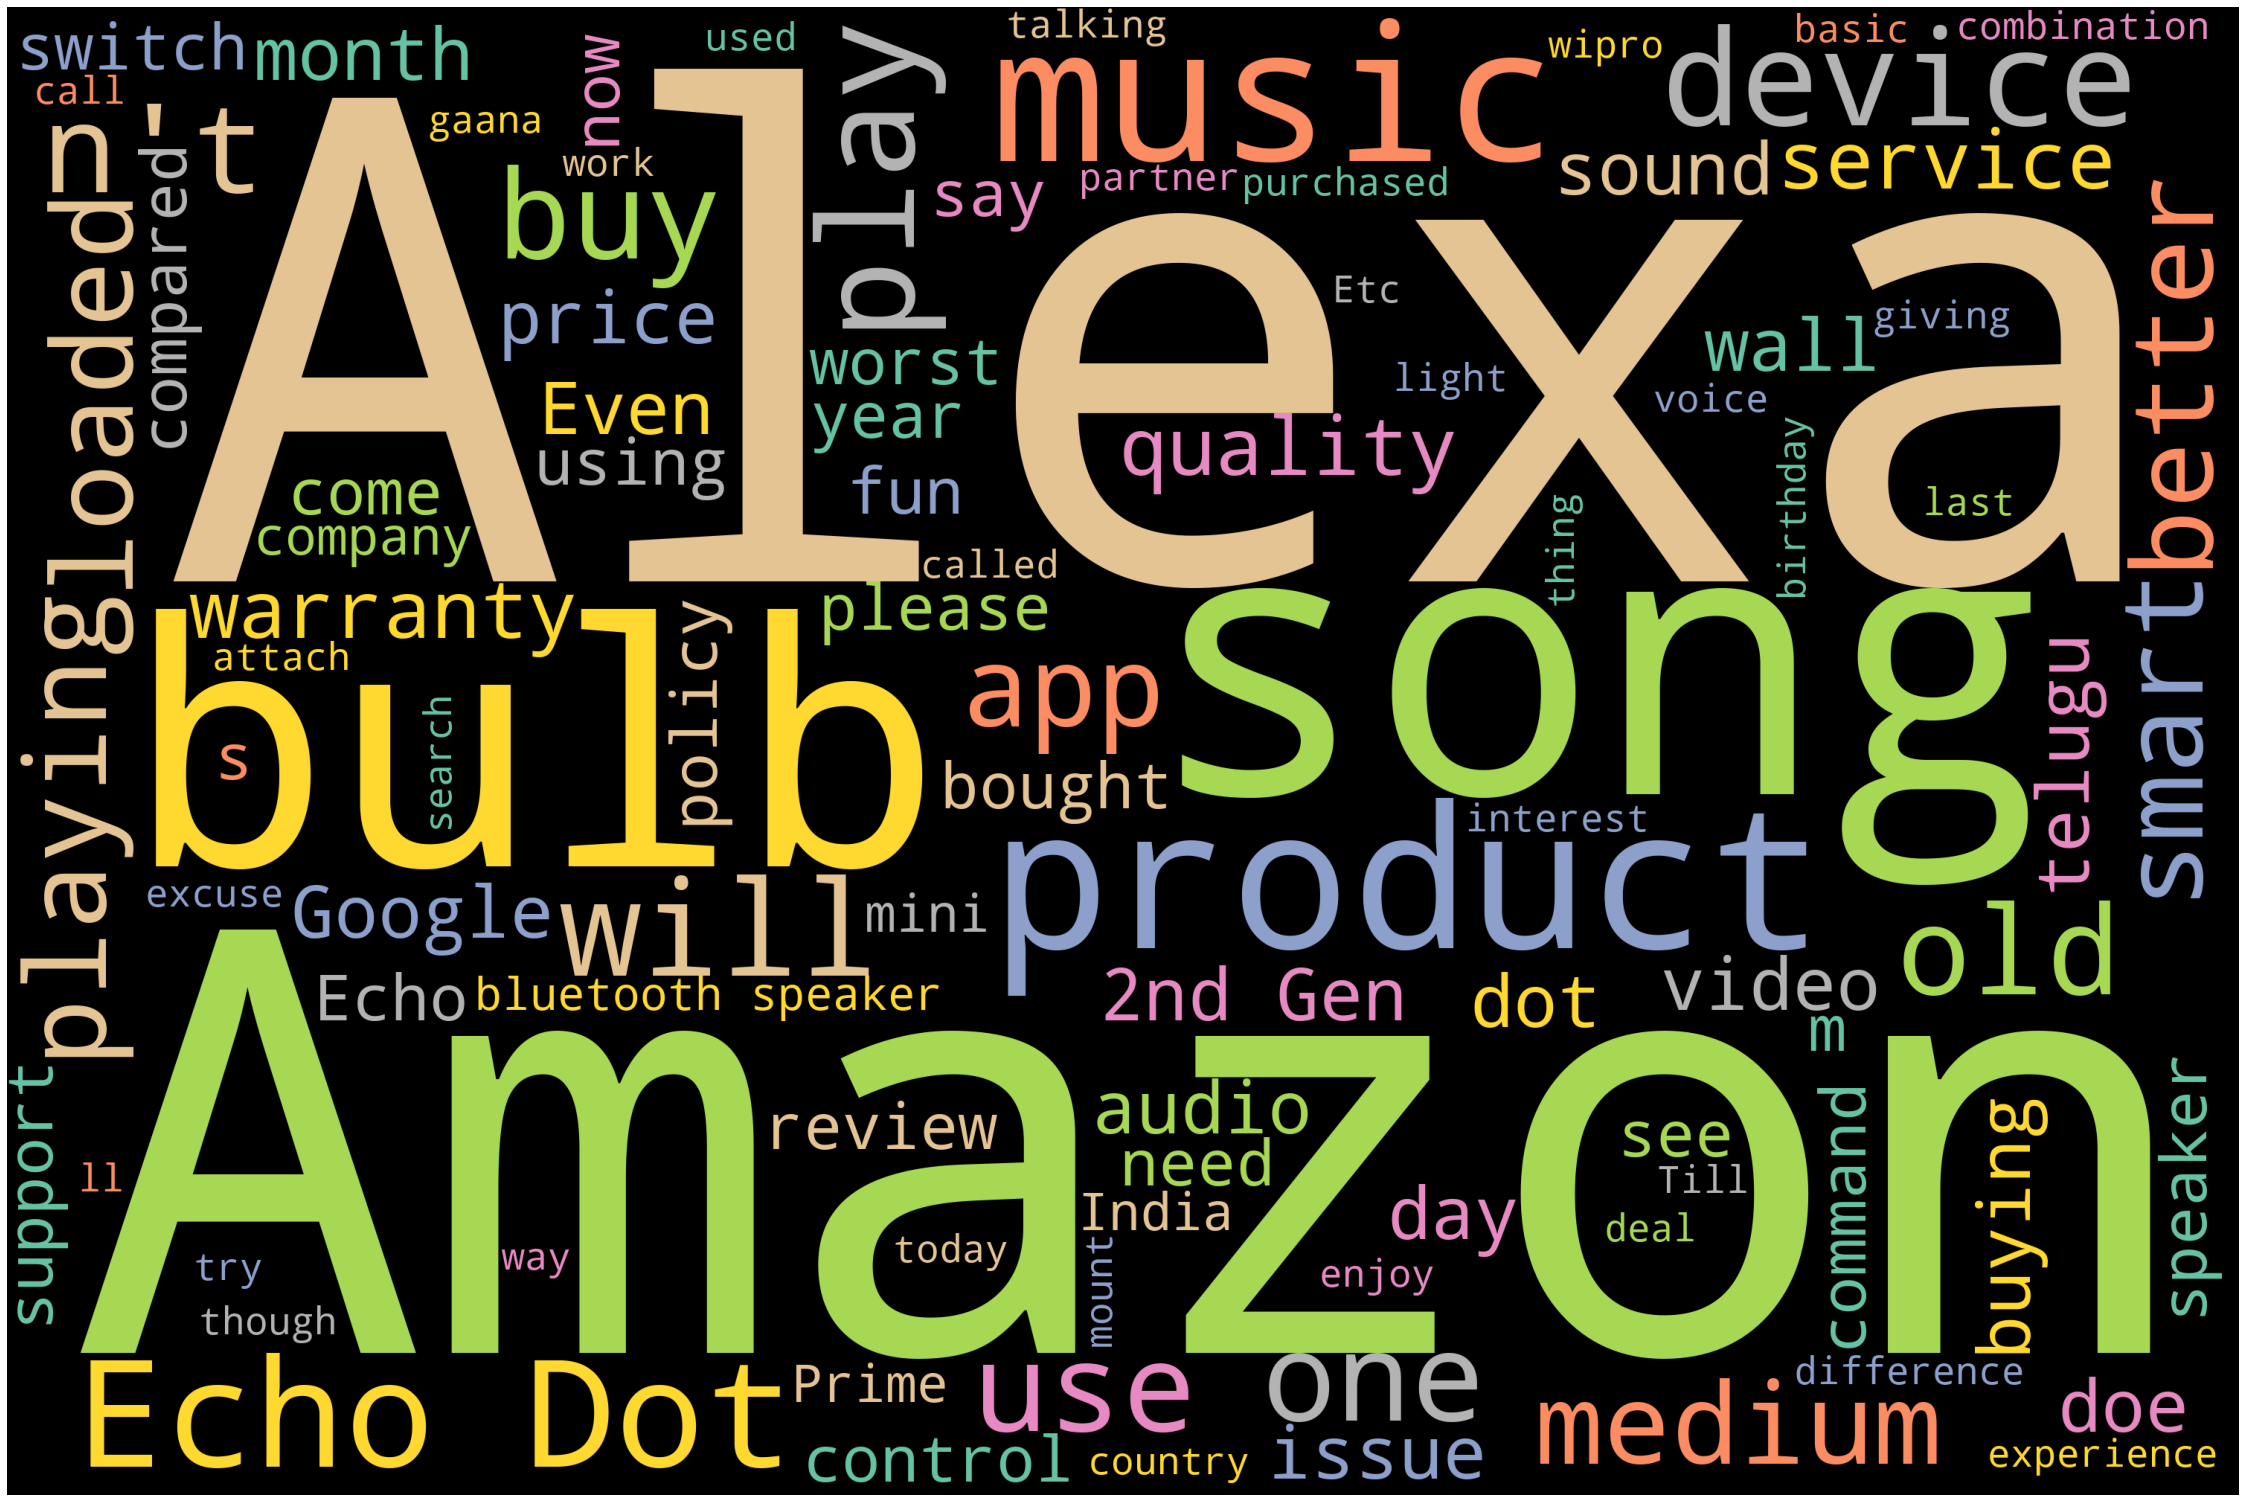

In [23]:
stopwords=STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',
                   max_words=100,colormap='Set2',stopwords=stopwords).generate(words)
plot_cloud(wordcloud)

In [24]:
#tokenizing
from nltk import tokenize
tokn_sent = tokenize.sent_tokenize(" ".join(Data_2))
tokn_sent[0:25]

['The media could not be loaded.',
 'Alexa cannot hear after she starts playing I purchased this as a birthday gift for my 7 years old son.',
 "Since he don't have siblings so I though it would be a fun experience for him talking to and giving commands to alexa.",
 'But to my dismay he only used it for playing music that also only one song after one month of his birthday.',
 '"Alexa please play the flying jat song".',
 'There were things I demonstrated him about alexa like jungle quiz, panchtantra ki kahaniya, alexa laugh, beatbox, fart!',
 'Etc.',
 'But after one month of use he lost interest in it and being powered from socket I am also not interested to use it as a bluetooth speaker.',
 'I configured it to control a wipro smart bulb.',
 'But after few days  I started using the smart bulb as a regular bulb because it\'s easier to press the physical switch compared to checking the configuration & connection everytime "Alexa Bulb on" or "Alexa bulb off" voice command doesn\'t work.',
 

In [25]:
dataframe = pd.DataFrame(tokn_sent, columns=['sentence'])
dataframe[0:20]

,sentence
0,The media could not be loaded.
1,Alexa cannot hear after she starts playing I p...
2,Since he don't have siblings so I though it wo...
3,But to my dismay he only used it for playing m...
4,"""Alexa please play the flying jat song""."
5,There were things I demonstrated him about ale...
6,Etc.
7,But after one month of use he lost interest in...
8,I configured it to control a wipro smart bulb.
9,But after few days I started using the smart ...


In [26]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stopwords = stopwords.words('english')
stopwords[0:25]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers']

In [28]:
#removing stopwords
dataframe['sentence1'] = dataframe['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (stopwords)]))

In [29]:
#removing punctuations
dataframe['clean'] = dataframe['sentence1'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))


In [30]:
dataframe

,sentence,sentence1,clean
0,The media could not be loaded.,The media could loaded.,The media could loaded.
1,Alexa cannot hear after she starts playing I p...,Alexa cannot hear starts playing I purchased b...,Alexa cannot hear starts playing I purchased b...
2,Since he don't have siblings so I though it wo...,Since siblings I though would fun experience t...,Since siblings I though would fun experience t...
3,But to my dismay he only used it for playing m...,But dismay used playing music also one song on...,But dismay used playing music also one song on...
4,"""Alexa please play the flying jat song"".","""Alexa please play flying jat song"".","""Alexa please play flying jat song""."
...,...,...,...
59,Just grab this before it goes back to its old ...,Just grab goes back old price.,Just grab goes back old price.
60,Even the smart bulb is very helpful.,Even smart bulb helpful.,Even smart bulb helpful.
61,While watching TV..just ask Alexa to turn bulb...,While watching TV..just ask Alexa turn bulb bl...,While watching TV..just ask Alexa turn bulb bl...
62,Not sure if this bulb can dim...if so..you can...,Not sure bulb dim...if so..you use day bulb ni...,Not sure bulb dim...if so..you use day bulb ni...


In [31]:
dataframe=dataframe.drop('sentence',axis=1)

In [32]:
dataframe=dataframe.drop('sentence1',axis=1)

In [33]:
dataframe.head(25)

,clean
0,The media could loaded.
1,Alexa cannot hear starts playing I purchased b...
2,Since siblings I though would fun experience t...
3,But dismay used playing music also one song on...
4,"""Alexa please play flying jat song""."
5,There things I demonstrated alexa like jungle ...
6,Etc.
7,But one month use lost interest powered socket...
8,I configured control wipro smart bulb.
9,But days I started using smart bulb regular bu...


In [34]:
from itertools import islice
def take(n,iterable):
    "Return first n items of the iterable as list"
    return list(islice(iterable,n))

In [35]:
#coverting to dic format and for 20 words
affinity_scores = affin.set_index('word')['value'].to_dict()
take(20,affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [36]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        clean = nlp(text)
        for word in clean:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [37]:
#calulating the sentiment value for each sentence
dataframe['sentiment_value'] = dataframe['clean'].apply(calculate_sentiment)

In [38]:
#calulating the number of words in each sentence
dataframe['word_count'] = dataframe['clean'].str.split().apply(len)
dataframe['word_count'].head(25)

0      4
1     13
2     11
3     11
4      6
5     15
6      1
7     14
8      6
9     27
10    10
11     9
12     4
13    14
14    48
15    22
16    16
17    13
18     2
19     4
20     3
21    70
22     8
23    16
24    10
Name: word_count, dtype: int64

In [39]:
#sort based on sentiment value
dataframe.sort_values(by='sentiment_value').head(25)

,clean,sentiment_value,word_count
22,Worst experience alexa warranty get product.Am...,-6,8
26,“ excuse amazon world wide companies change po...,-4,15
25,They giving fake excuses service temporary un ...,-4,21
30,Amazon shame Amazon shameful Before buying pro...,-3,17
13,"/*Here I'm Uploading video, enjoy*/Most idioti...",-3,14
58,Its integration smart devices unparalled mini ...,-2,9
23,Ctdi partner official amazon devices service p...,-2,16
44,"One thing disappointed say 'Alexa, play old te...",-2,26
47,"Frequently group play together, use drop creat...",-1,13
33,You cannot scrub music know song playing move ...,0,11


In [40]:
dataframe['index']=range(0,len(dataframe))

In [41]:
dataframe.head()

,clean,sentiment_value,word_count,index
0,The media could loaded.,0,4,0
1,Alexa cannot hear starts playing I purchased b...,2,13,1
2,Since siblings I though would fun experience t...,4,11,2
3,But dismay used playing music also one song on...,0,11,3
4,"""Alexa please play flying jat song"".",1,6,4


<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

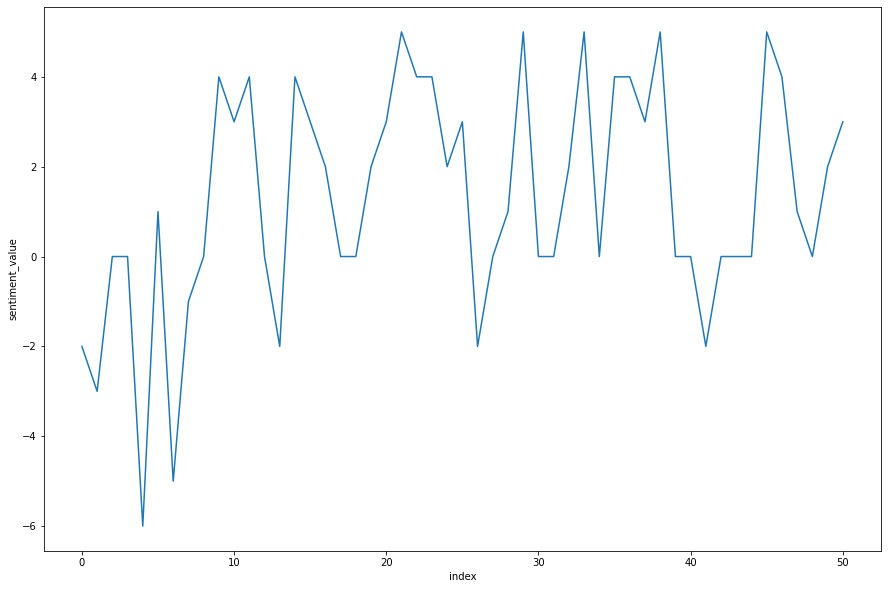

In [48]:
#lineplot based on sentiment value
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=dataframe)

Here most of the reviews are Positive also negative reviews very less.
So from overall reviews we can conclude that its a good product
